In [1]:
import sys
from pathlib import Path

SOURCE_FILES = str(Path.cwd().parent)
if SOURCE_FILES not in sys.path:
    sys.path.append(SOURCE_FILES) 

sys.executable

'/home/gurkandurmus/anaconda3/envs/custom_base/bin/python'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn import preprocessing

from src import config

In [51]:
train_file = "categorical_features_train.csv"
test_file = "categorical_features_test.csv"
df_train = pd.read_csv(config.INPUT_DIR / train_file)
df_test = pd.read_csv(config.INPUT_DIR / test_file)
df_train

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,0.0,1.0,0.0,T,N,Red,Polygon,Axolotl,India,...,015c63324,3.0,Novice,Freezing,a,R,GZ,5.0,NaN,0
599996,599996,1.0,0.0,0.0,T,Y,Blue,Polygon,Dog,Costa Rica,...,a02ae6a63,2.0,Novice,Boiling Hot,n,N,sf,NaN,3.0,0
599997,599997,0.0,0.0,0.0,F,Y,Red,Circle,Axolotl,Russia,...,40f9610c1,2.0,Contributor,Freezing,n,H,MV,7.0,5.0,0
599998,599998,1.0,1.0,0.0,F,Y,NaN,Polygon,Axolotl,NaN,...,c1a8374a0,1.0,Master,Warm,m,X,Ey,1.0,5.0,0


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

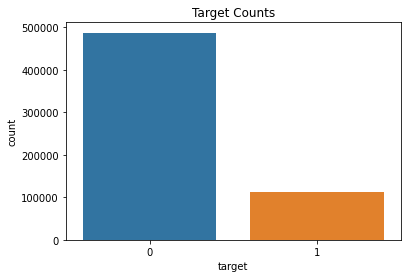

In [53]:
plt.figure(figsize=(6,4))
plt.title("Target Counts")
seaborn.countplot(data=df_train, x="target")
plt.show()

In [54]:
df_train["ord_2"].value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [55]:
df_train.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

In [56]:
df_train.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

In [57]:
df_train.groupby(["ord_1","ord_2"])["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


In [58]:
# create new features from categorical features
df_train["new_feature"] = (
    df_train["ord_1"].astype(str) + "_" + df_train["ord_2"].astype(str)
)
df_train.loc[:,["new_feature"]]

,new_feature
0,Contributor_Hot
1,Grandmaster_Warm
2,nan_Freezing
3,Novice_Lava Hot
4,Grandmaster_Cold
...,...
599995,Novice_Freezing
599996,Novice_Boiling Hot
599997,Contributor_Freezing
599998,Master_Warm


In [40]:
# Handling unseen categories 
# concat train/test data to get all the labels for a feature
df_test.loc[:, "target"] = -1
data = pd.concat([df_train, df_test]).reset_index(drop=True)
features = [col for col in data.columns if col not in ["id", "target"]]
for feature in features:
    label_enc = preprocessing.LabelEncoder()
    temp_col = data[feature].fillna("NONE").astype(str)
    data.loc[:, feature] = label_enc.fit_transform(temp_col)

train = data[data["target"] != -1].reset_index(drop=True)
test = data[data["target"] == -1].reset_index(drop=True)

In [74]:
# Handling unseen categories - second way: create a rare category value which new/unseen data will belong to. 
rare_categories = df_train["ord_4"].value_counts().loc[lambda freq: freq<2000].index
df_train.loc[df_train["ord_4"].isin(rare_categories), "ord_4"] = "RARE"
df_train["ord_4"].value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

In [10]:
# Convert a matrix to a sparse form
from scipy import sparse

n_rows = 100
n_cols = 100
example = np.random.binomial(n=1, p=0.05, size=(n_rows, n_cols))
# size in bytes
print(f"Dense represantation takes: {example.nbytes} bytes.")

sparse_example = sparse.csr_matrix(example)
full_size = (
    sparse_example.data.nbytes +
    sparse_example.indices.nbytes +
    sparse_example.indptr.nbytes
)
print(f"Sparse represantation takes: {full_size} bytes")

Dense represantation takes: 80000 bytes.
Sparse represantation takes: 5912 bytes


In [24]:
# Create a random 1-D array with different categories(int)
example = np.random.randint(1000, size=1000)
one_hot_encoder = preprocessing.OneHotEncoder(sparse=False)
one_hot_encoder.fit(example.reshape(-1,1))
example_encoded = one_hot_encoder.transform(example.reshape(-1,1))

print(f"OneHotEncoded Dense array: {example_encoded.nbytes}")

sparse_example_encoded = sparse.csr_matrix(example_encoded)
full_size = (
    sparse_example_encoded.data.nbytes +
    sparse_example_encoded.indices.nbytes +
    sparse_example_encoded.indptr.nbytes
)
print(f"OneHotEncoded Sparse array: {full_size}")


OneHotEncoded Dense array: 5056000
OneHotEncoded Sparse array: 16004
